<a href="https://colab.research.google.com/github/DarkSoulPS/MLAssignmentG03/blob/main/Assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [15]:
# Imports
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn import svm
from sklearn import preprocessing
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

import matplotlib.pyplot as plt # plotting
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import seaborn as sns

import numpy as np
import time

!git clone https://github.com/DarkSoulPS/MLAssignmentG03
%cd  MLAssignmentG03


Cloning into 'MLAssignmentG03'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 1.06 MiB | 6.03 MiB/s, done.
/content/MLAssignmentG03/MLAssignmentG03/MLAssignmentG03


# Loading data


In [5]:
#Loading data
#Source
#https://www.kaggle.com/code/absolutegaming/road-prediction#Modelling


#Load Data from Github
opel_corsa_01 = pd.read_csv('/content/MLAssignmentG03/data/opel_corsa_01.csv',delimiter=';',index_col=0)
opel_corsa_02 = pd.read_csv('/content/MLAssignmentG03/data/opel_corsa_02.csv',delimiter=';',index_col=0)
peugeot_207_01 = pd.read_csv('/content/MLAssignmentG03/data/peugeot_207_01.csv',delimiter=';',index_col=0)
peugeot_207_02 = pd.read_csv('/content/MLAssignmentG03/data/peugeot_207_02.csv',delimiter=';',index_col=0)

#print Size of each dataset
print("Size of Opel_data1 is",opel_corsa_01.shape)
print("Size of Opel_data2 is",opel_corsa_02.shape)
print("Size of Peugeot_data1 is",peugeot_207_01.shape)
print("Size of Peugeot_data2 is",peugeot_207_02.shape)

#Combine the data
combined_data = pd.concat([opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02], ignore_index=True)
print("Size of combined data is",combined_data.shape)

#Combining car specific dataset
combined_data_opel = pd.concat([opel_corsa_01, opel_corsa_02], ignore_index=True)
print("Size of combined opel data is",combined_data_opel.shape)

combined_data_peugeot = pd.concat([peugeot_207_01, peugeot_207_02], ignore_index=True)
print("Size of combined Peugeot data is",combined_data_peugeot.shape)

#Based on the analysis , whole dataset , each car dataset or car type dataset can be used

Size of Opel_data1 is (7038, 17)
Size of Opel_data2 is (4092, 17)
Size of Peugeot_data1 is (8199, 17)
Size of Peugeot_data2 is (4446, 17)
Size of combined data is (23775, 17)
Size of combined opel data is (11130, 17)
Size of combined Peugeot data is (12645, 17)


# Data cleaning


Tha data from the assignment is already proceeed compared to the source in Kaggle. However some rows have missing data. Since the number of rows with missing data is very less compared to the whole number of data we are removing the rows without data

In [10]:
# Handle missing values
#Remove the rows with NA (empty cells )
combined_data.dropna(inplace=True)
combined_data_opel.dropna(inplace=True)
combined_data_peugeot.dropna(inplace=True)

# Alternatively you can replace the cells with 0 (Not used)
#combined_data = combined_data.fillna(0)

# Another option is to replace with a value based on the nearby values (mean, gaussian, etc) or the average of the whole column
# to be implemented if needed derive gaussion


#Reference : Gagolewski, Marek. (2023). Minimalist Data Wrangling with Python. 10.5281/zenodo.6451068.
#pandas.DataFrame.drop_duplicates
traffic_pCM=combined_data
dups = traffic_pCM.duplicated()
# report if there are any duplicates
print("Duplicates are present -->",dups.any())
# list all duplicate rows
print("List of duplicates :",traffic_pCM[dups])

#noduplicate in the base data


print("The columns in the dataset \n",combined_data.columns) # Print the column entries of my dataset

combined_data.info()

print("\n Shape of  traffic data",combined_data[['traffic']].shape)


#The outputs are catergorical type and can not be used of the calculations
#the outputs are converted to logical array. one logical array is created
#for each possible outcome

road_surf_unique = list(combined_data["roadSurface"].unique())
traffic_unique = list(combined_data["traffic"].unique())
drivingStyle_unique = list(combined_data["drivingStyle"].unique())

print(road_surf_unique);
print(traffic_unique);
print(drivingStyle_unique);

one_hot_encoding = pd.get_dummies(combined_data[["drivingStyle"]]);
Traffic_encoding = pd.get_dummies(combined_data[["traffic"]]);
RdQlty_encoding  = pd.get_dummies(combined_data[["roadSurface"]]);

#print(Traffic_encoding.head())
one_hot_encoding['Target']= one_hot_encoding.values.tolist();
Traffic_encoding['Target']=Traffic_encoding.values.tolist();
RdQlty_encoding['Target'] =RdQlty_encoding.values.tolist();





Duplicates are present --> False
List of duplicates : Empty DataFrame
Columns: [AltitudeVariation, VehicleSpeedInstantaneous, VehicleSpeedAverage, VehicleSpeedVariance, VehicleSpeedVariation, LongitudinalAcceleration, EngineLoad, EngineCoolantTemperature, ManifoldAbsolutePressure, EngineRPM, MassAirFlow, IntakeAirTemperature, VerticalAcceleration, FuelConsumptionAverage, roadSurface, traffic, drivingStyle]
Index: []
The columns in the dataset 
 Index(['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
       'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23762 entries, 0 to 23774
Data columns (total 17 columns):
 #   Column  

# Correlation matrix

In [17]:
# Correlation matrix
# reference
# https://www.kaggle.com/code/kerneler/starter-traffic-driving-style-and-e9801015-8
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)

    for (i, j), z in np.ndenumerate(corr):
        plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for data', fontsize=15)
    plt.show()


# Data Exploration

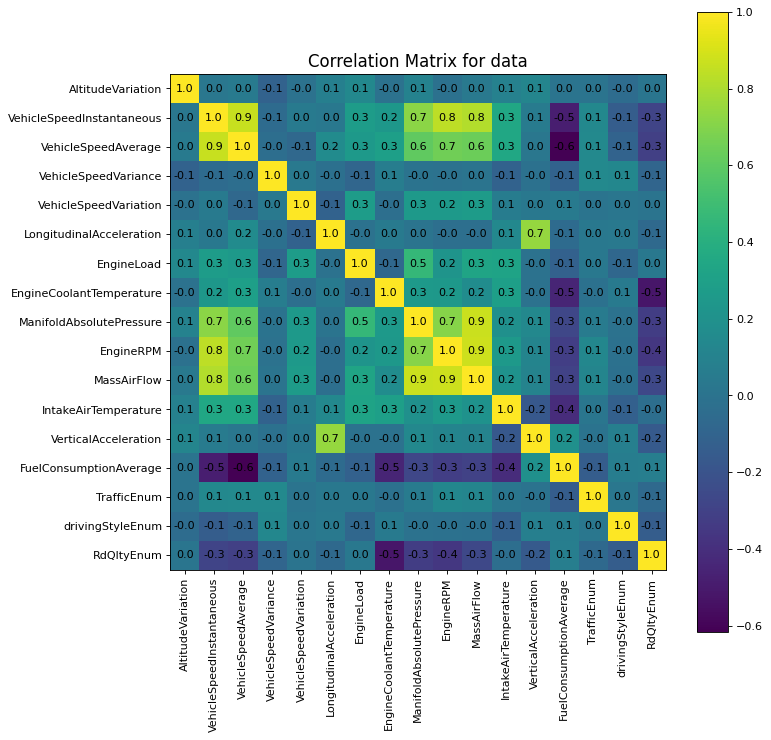

(23762, 17)
AltitudeVariation
0, 984, 4.1%


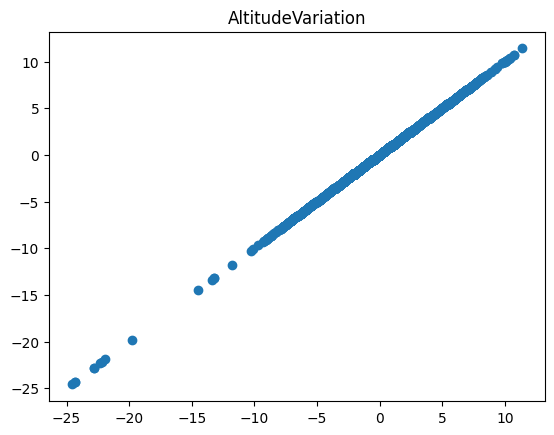

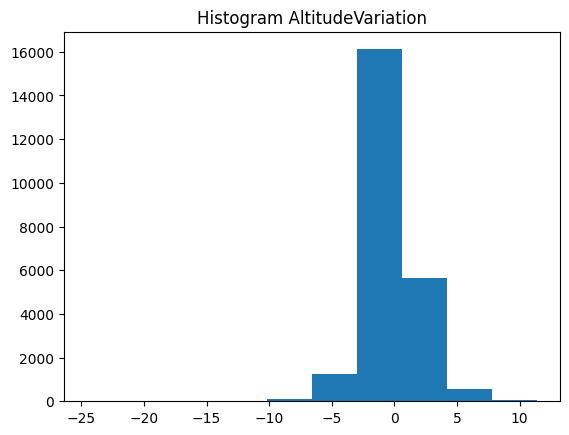

VehicleSpeedInstantaneous
1, 750, 3.2%


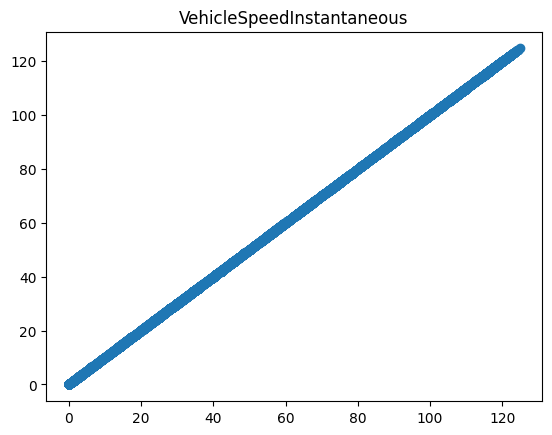

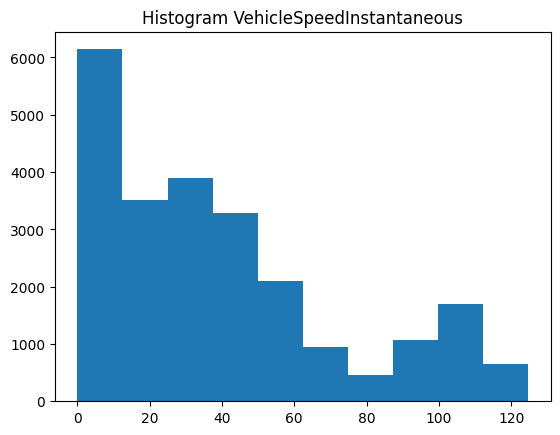

VehicleSpeedAverage
2, 21743, 91.5%


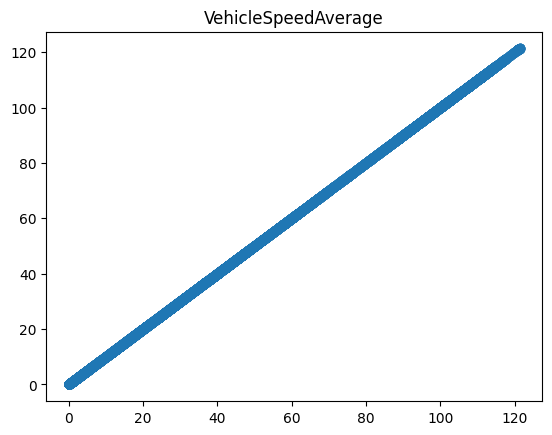

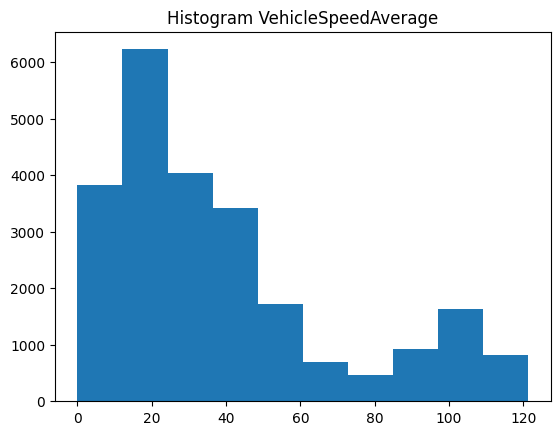

VehicleSpeedVariance
3, 22376, 94.2%


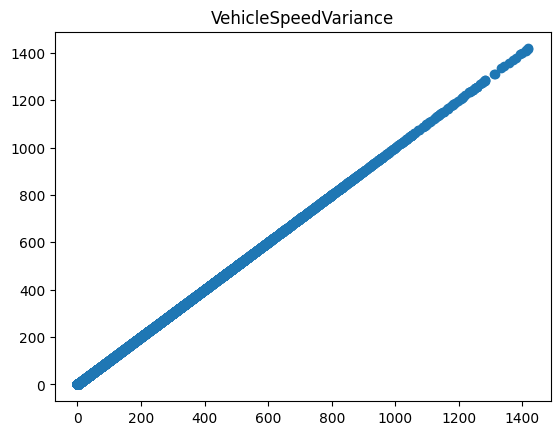

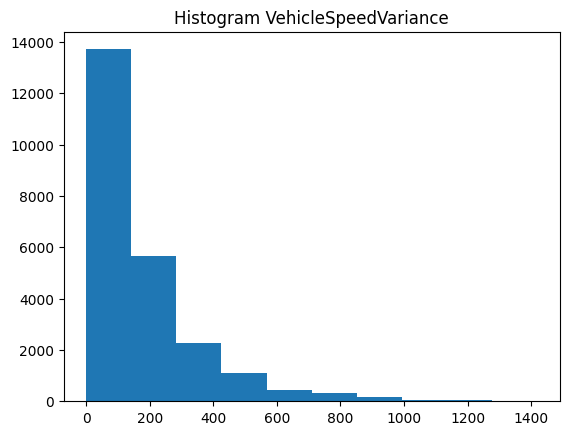

VehicleSpeedVariation
4, 1797, 7.6%


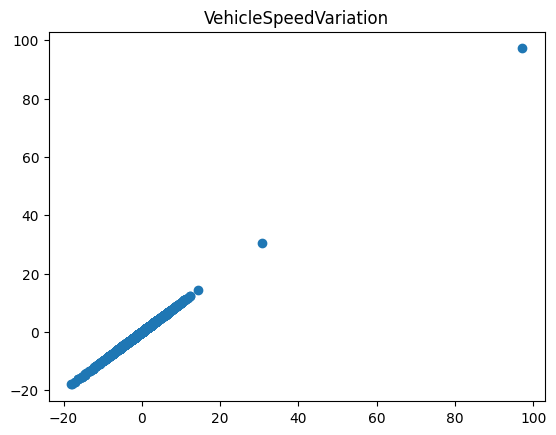

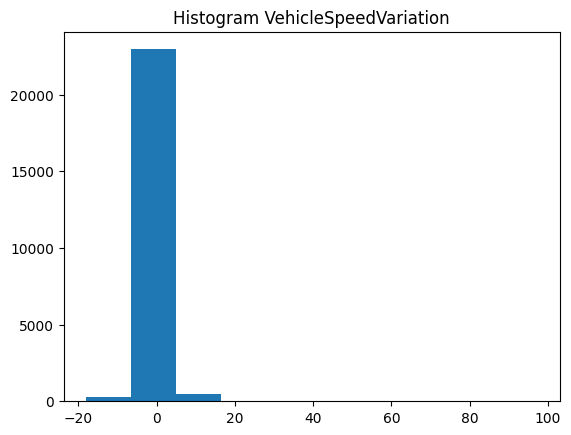

LongitudinalAcceleration
5, 12824, 54.0%


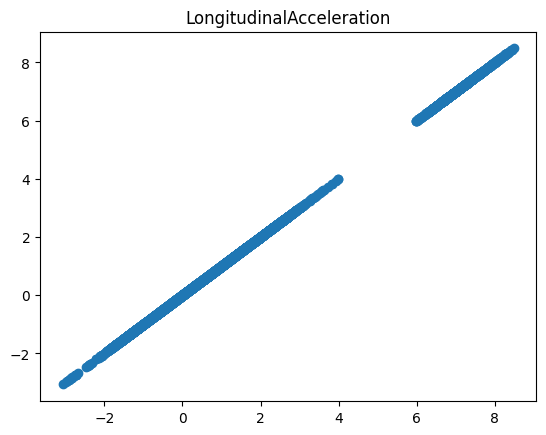

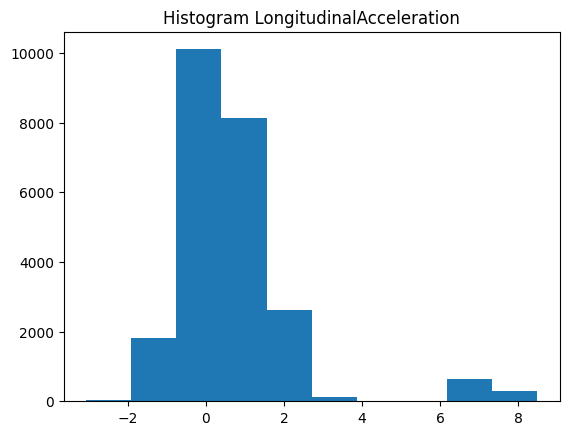

EngineLoad
6, 256, 1.1%


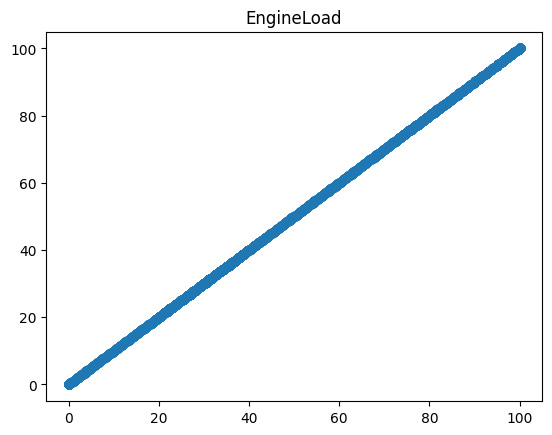

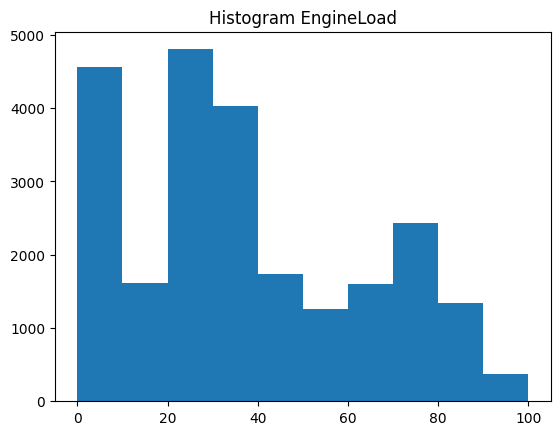

EngineCoolantTemperature
7, 78, 0.3%


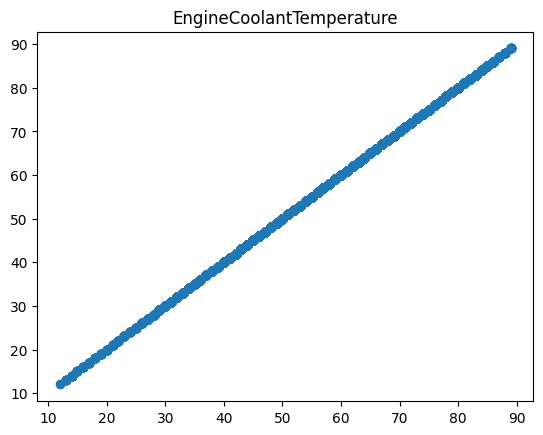

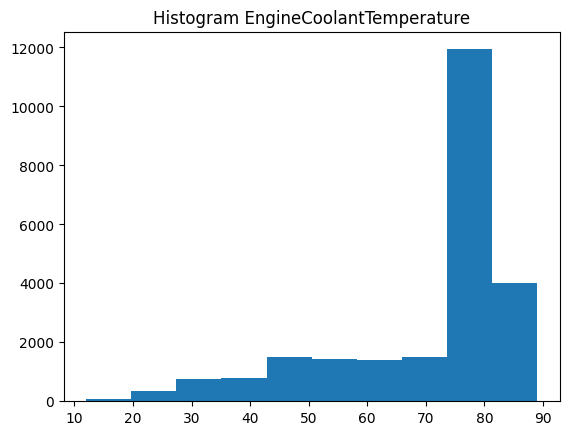

ManifoldAbsolutePressure
8, 148, 0.6%


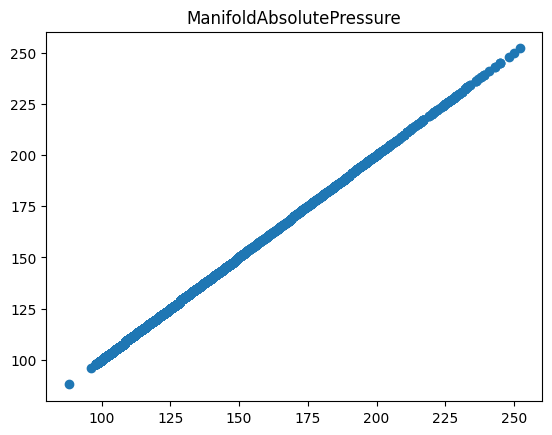

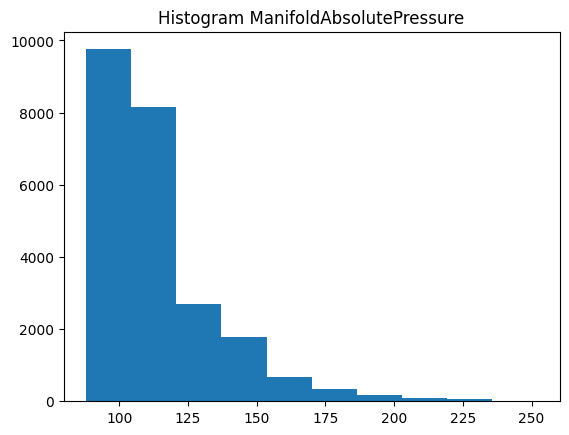

EngineRPM
9, 3766, 15.8%


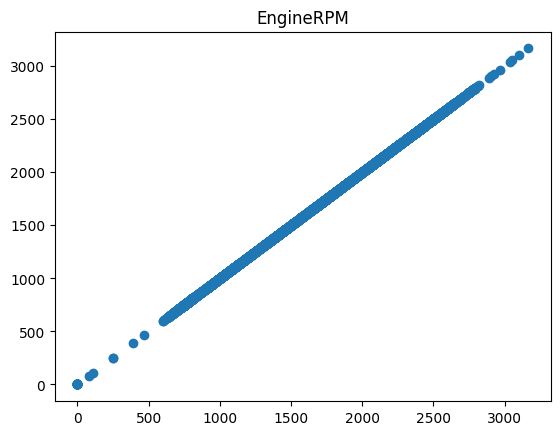

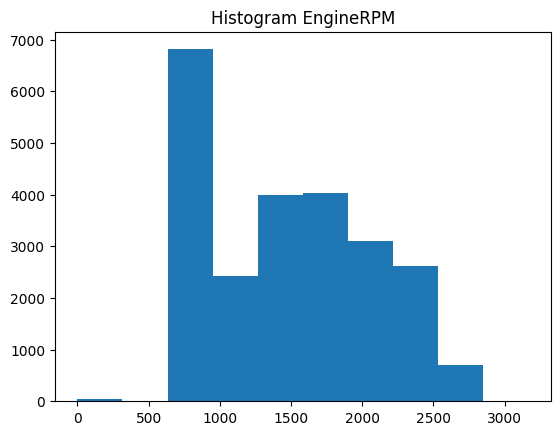

MassAirFlow
10, 2823, 11.9%


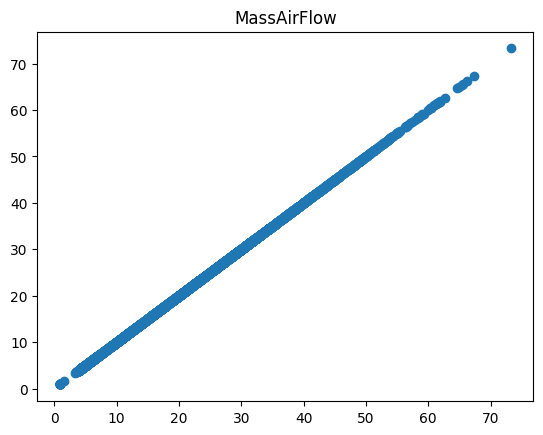

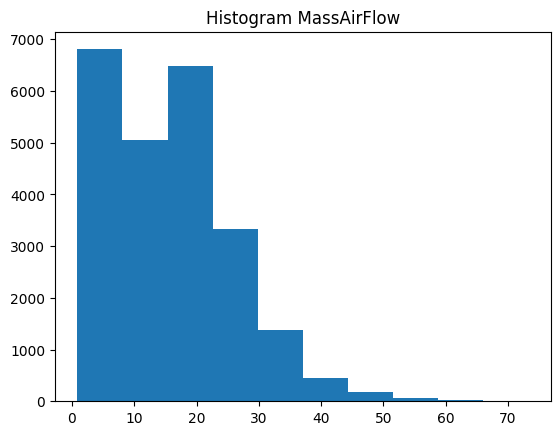

IntakeAirTemperature
11, 59, 0.2%


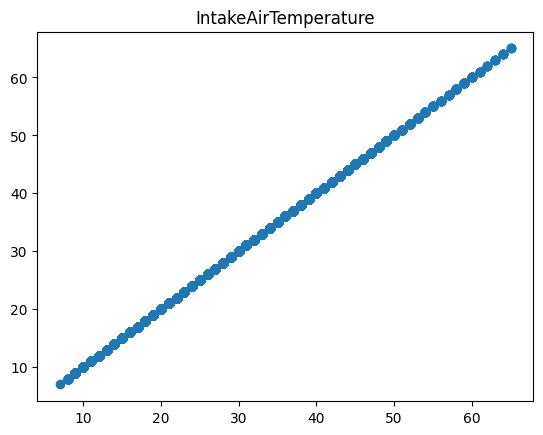

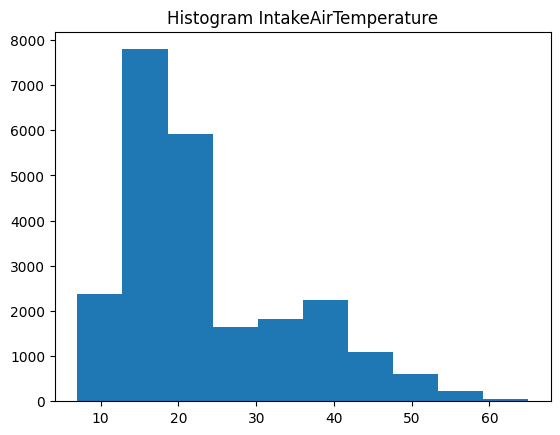

VerticalAcceleration
12, 11160, 47.0%


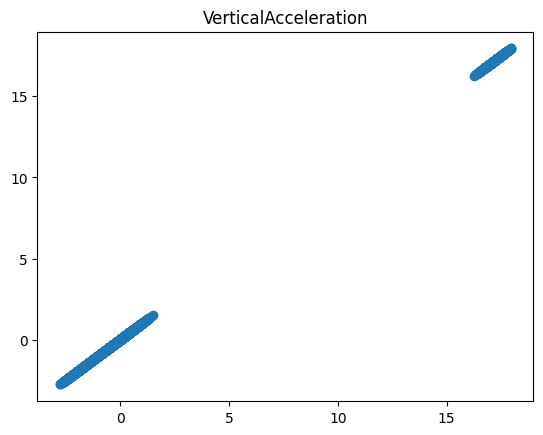

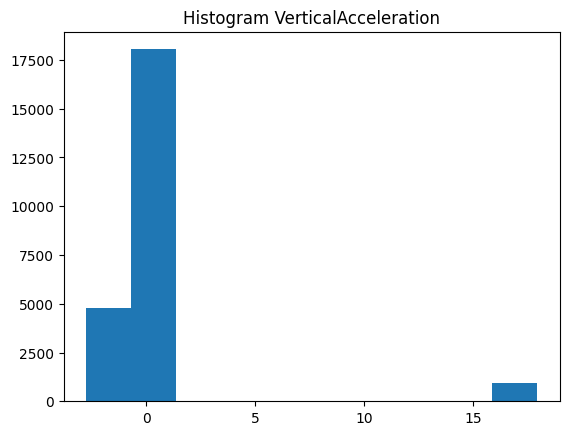

FuelConsumptionAverage
13, 19023, 80.1%


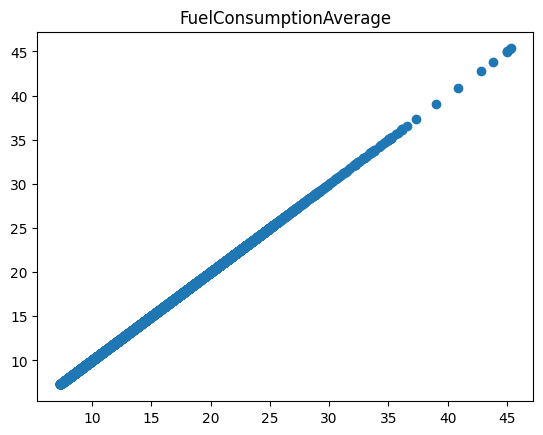

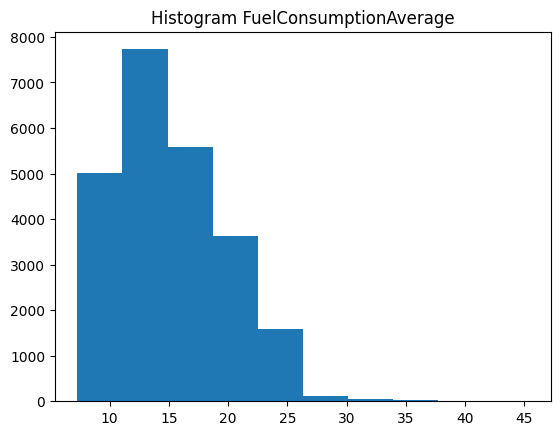

TrafficEnum
14, 3, 0.0%


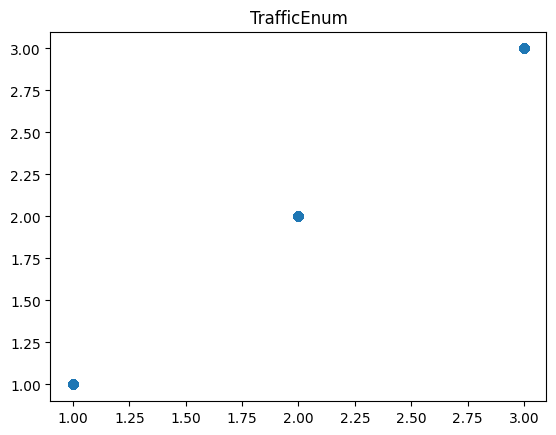

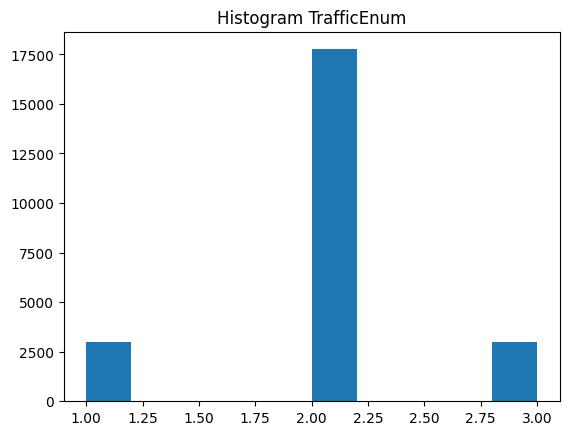

drivingStyleEnum
15, 2, 0.0%


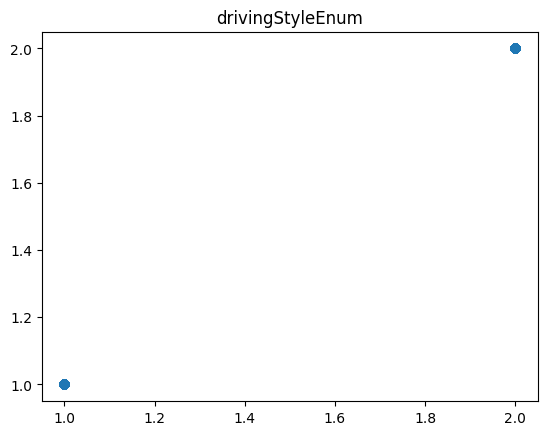

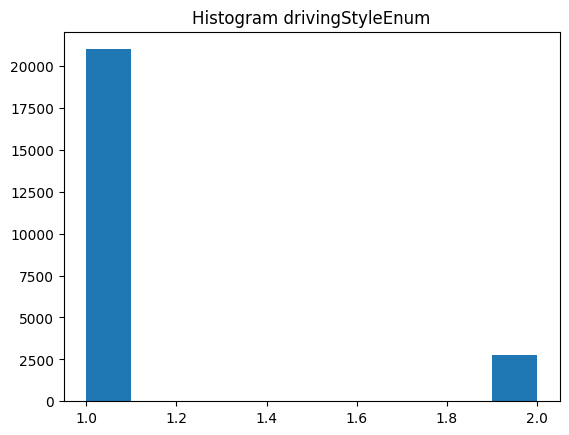

RdQltyEnum
16, 3, 0.0%


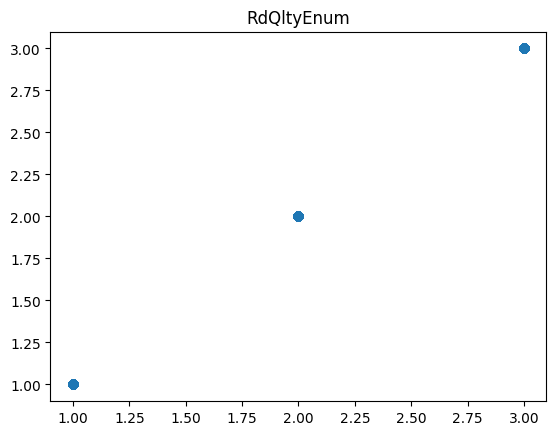

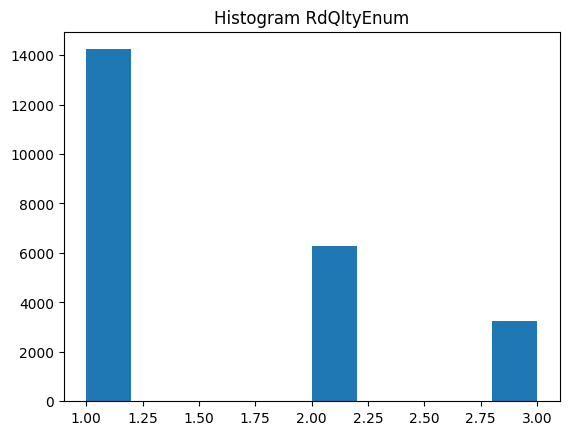

In [19]:

# Data Exploration
# reference
# https://www.kaggle.com/code/kerneler/starter-traffic-driving-style-and-e9801015-8

traffic_unique=list(combined_data["traffic"].unique());
#print(traffic_unique)
traffic_pCM=combined_data
#

#converting the catergoical column to Numerical column to plot correlation
traffic_pCM['TrafficEnum']=Traffic_encoding['traffic_HighCongestionCondition']*1+Traffic_encoding['traffic_LowCongestionCondition']*2+Traffic_encoding['traffic_NormalCongestionCondition']*3
traffic_pCM['drivingStyleEnum']=one_hot_encoding['drivingStyle_EvenPaceStyle']*1+one_hot_encoding['drivingStyle_AggressiveStyle']*2
traffic_pCM['RdQltyEnum']=RdQlty_encoding['roadSurface_SmoothCondition']*1+RdQlty_encoding['roadSurface_UnevenCondition']*2+RdQlty_encoding['roadSurface_FullOfHolesCondition']*3


#traffic_pCM=traffic_pCM['roadSurface'].replace(['SmoothCondition', 'UnevenCondition ','FullOfHolesCondition'],[0,1,2])
traffic_pCM=traffic_pCM.drop(["traffic","drivingStyle","roadSurface"], axis = 1);
#traffic_pCM.info()

plotCorrelationMatrix(traffic_pCM,10)
print(traffic_pCM.shape)
Col = traffic_pCM.columns;

# summarize the number of unique values in each column
for i in range(traffic_pCM.shape[1]):
 idnum=Col[i]
 id= traffic_pCM[Col[i]]
 col_unique = list(id.unique())
 num = len(col_unique)
 percentage = float(num) / traffic_pCM.shape[0] * 100
 print(Col[i])
 print('%d, %d, %.1f%%' % (i, num, percentage))
 plt.figure()
 plt.scatter(id,id)
 plt.title(Col[i])
 plt.figure()
 plt.hist(id)
 plt.title('Histogram %s'% (Col[i]))
 plt.show()


# Histogram and self correlation analysis is done to analyse the all signals.
# From the Histogram plots it can be noted none of the features is normally distributed and shows
# different non linear distributions for each feature.

# Understanding from
# M. Sahu, N. A. Francis, A. Sahu and P. Ulhe, "Data Wrangling and Visualization for Credibility and Usability," 2022 6th International Conference on Intelligent Computing and Control Systems (ICICCS), Madurai, India, 2022, pp. 1834-1840, doi: 10.1109/ICICCS53718.2022.9788316.
# look at reference paper of the above the paper






# Feature selection

In [39]:
#Feature Selection and Engineering
#Selection of the most relevant feautures that will give the most accurate results.
Traffic_drop_features = ['ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow']
Std_Outputs = ["roadSurface", "traffic", "drivingStyle","TrafficEnum","drivingStyleEnum","RdQltyEnum"]


# Creating the dataset for training


Training for Driving Style(Micheal)

In [40]:
df_processed = combined_data.drop(Std_Outputs+Traffic_drop_features, axis = 1)
df_processed['Target'] = one_hot_encoding['Target']

# Shuffling our training data frame
df_processed = shuffle(df_processed)

x_features = df_processed.drop(['Target'], axis=1) # Separating the features
y_labels = np.array(df_processed['Target'].values.tolist()) # Selecting our lables
print(x_features.shape)
print(y_labels.shape)

# Splitting the data into a 80% training to 20% testing
X_train, X_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# normalising the data between zero and one
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit(X_train)

x_train_transformed = min_max_scaler.transform(X_train)
x_test_transformed = min_max_scaler.transform(X_test)

print(x_train_transformed.shape)
print(x_test_transformed.shape)

print(y_train.shape)
print(y_test.shape)


(23762, 11)
(23762, 2)
(19009, 11) (4753, 11) (19009, 2) (4753, 2)
(19009, 11)
(4753, 11)
(19009, 2)
(4753, 2)


Training for Traffic types (Partha)

In [41]:

#Traffic condition Machine
start = time.time()
df_Traffic_processed = combined_data.drop(Std_Outputs+Traffic_drop_features, axis = 1)
df_Traffic_processed['Target'] = Traffic_encoding['Target']

# Shuffling our training data frame
df_Traffic_processed = shuffle(df_Traffic_processed)

Traffic_x_features = df_Traffic_processed.drop(['Target'], axis=1) # Separating the features
Traffic_y_labels = np.array(df_Traffic_processed['Target'].values.tolist()) # Selecting our lables
print("Traffic_x_features.shape",Traffic_x_features.shape)
print("Traffic_y_labels.shape",Traffic_y_labels.shape)

# Splitting the data into a 80% training to 20% testing
Traffic_X_train, Traffic_X_test, Traffic_y_train, Traffic_y_test = train_test_split(Traffic_x_features, Traffic_y_labels, test_size=0.2, random_state=1)
print(Traffic_X_train.shape, Traffic_X_test.shape, Traffic_y_train.shape, Traffic_y_test.shape)

# normalising the data between zero and one
Traffic_min_max_scaler = preprocessing.MinMaxScaler()
Traffic_x_scaled = Traffic_min_max_scaler.fit(Traffic_X_train)

Traffic_x_train_transformed = Traffic_min_max_scaler.transform(Traffic_X_train)
Traffic_x_test_transformed = Traffic_min_max_scaler.transform(Traffic_X_test)

print(Traffic_x_train_transformed.shape)
print(Traffic_x_test_transformed.shape)

print(Traffic_y_train.shape)
print(Traffic_y_test.shape)
end = time.time()
print("preprocessing time ",end - start)



Traffic_x_features.shape (23762, 11)
Traffic_y_labels.shape (23762, 3)
(19009, 11) (4753, 11) (19009, 3) (4753, 3)
(19009, 11)
(4753, 11)
(19009, 3)
(4753, 3)
preprocessing time  0.06790995597839355


# Principal Component Analysis


Principal Component Analysis
38018
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


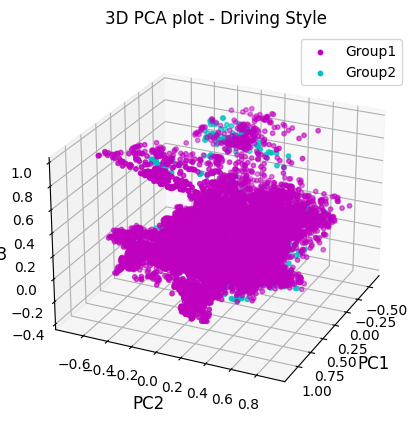

In [21]:
# Principal Component Analysis
  # Reference
# https://statisticsglobe.com/3d-plot-pca-python


pca = PCA(n_components=3)
pca.fit(x_train_transformed)
pca_driving = pca.transform(x_train_transformed)

Xax = pca_driving[:,0]
Yax = pca_driving[:,1]
Zax = pca_driving[:,2]

cdict = {0:'m',1:'c'}
label = {0:'Group1',1:'Group2'}

# PCA is a technique employed to reduce the dimensionality of a multi variable data.
# However, it is a linear projection from the original features. I attemnt to reduce the dimensionality to 3 dimensions.
# But the PCA visualization shows no benefit for classification. Figure xxxx shows that the driving style cna not be linearly classified
# as the features are all clustered together. Hence we propose to run the classifiers on the complete dataset features.

print('Principal Component Analysis')
print(y_train.size)
print(y_train)
y = y_train[:,0]

# plot a 3D Graph
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix],
            Yax[ix],
            Zax[ix],
            c=cdict[l],
            s=10,
        label=label[l])

ax.set_xlabel("PC1",fontsize=12)
ax.set_ylabel("PC2",fontsize=12)
ax.set_zlabel("PC3",fontsize=12)

ax.view_init(25, 25,0)
ax.legend()
plt.title("3D PCA plot - Driving Style")
plt.show()



PCA for Traffic congenstion


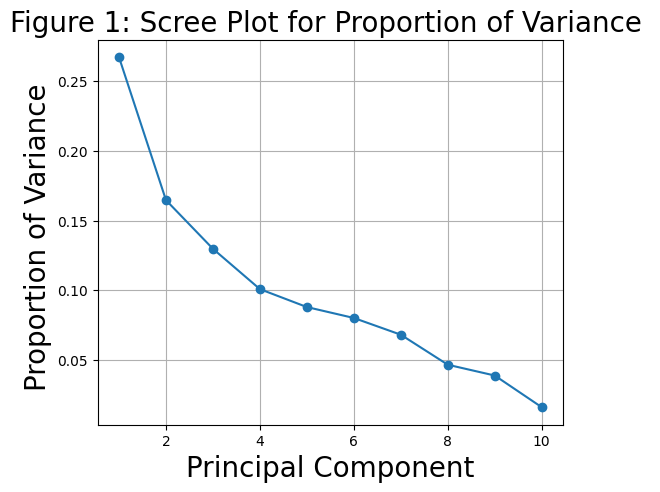

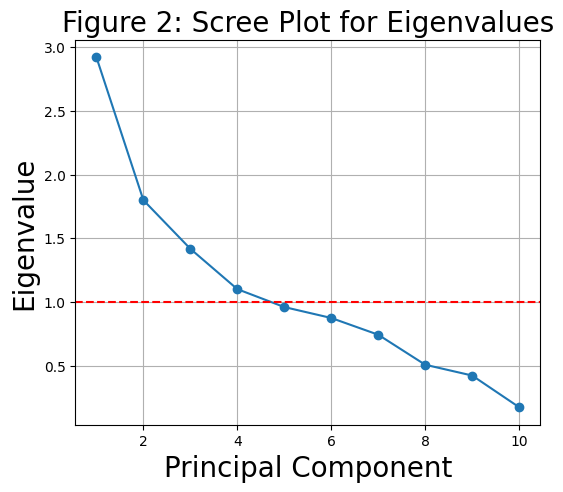

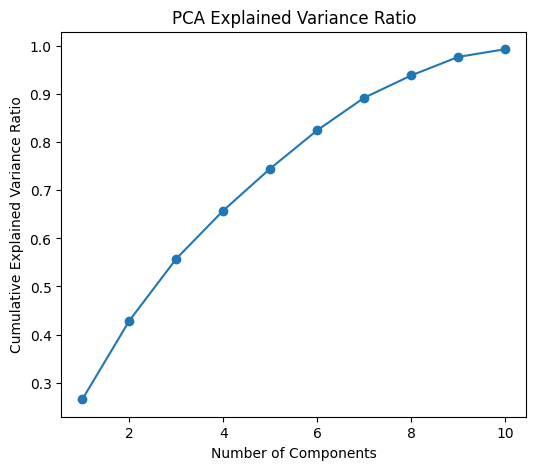

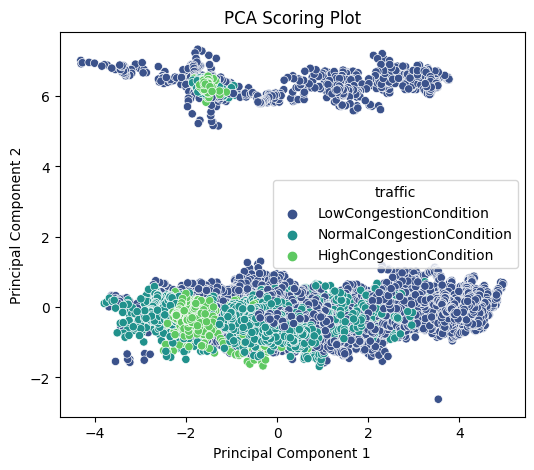

In [54]:
#PCA for Traffic congenstion

df=combined_data;
X=df.drop(Std_Outputs+Traffic_drop_features, axis = 1);
y = df['traffic']

df_Traffic_processed.shape[1]
pca = PCA(n_components=X.shape[1]-1)

scaler = StandardScaler()
Std_scaled = scaler.fit_transform(X)

pca.fit(Std_scaled)
pca_traffic = pca.transform(Std_scaled)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(6,5))
plt.plot(np.arange(1, len(prop_var)+1),
                   prop_var, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Proportion of Variance ',
           size = 20)
plt.title('Figure 1: Scree Plot for Proportion of Variance ',
          size = 20)
plt.grid(True)


plt.figure(figsize=(6,5))
plt.plot(np.arange(1, len(eigenvalues)+1),
         eigenvalues, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Eigenvalue',
           size = 20)
plt.title('Figure 2: Scree Plot for Eigenvalues',
          size = 20)
plt.axhline(y=1, color='r',
            linestyle='--')
plt.grid(True);


#From the PCA chart, using Kaiser’s Rule , number of component is choosen as 4

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(6, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Plot PCA scoring plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_traffic[:, 0], y=pca_traffic[:, 1], hue=y, palette='viridis')
plt.title('PCA Scoring Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Creating a model


Machine for Driving style

In [ ]:
#Random Forest Classifier

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

#Training the model
multi_target_forest.fit(x_train_transformed, y_train)

# Prediction
y_test_predicted = multi_target_forest.predict(x_test_transformed)
print(y_test_predicted)

acc = accuracy_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted,average=None)
F1 = f1_score(y_test, y_test_predicted,average=None)
prec = precision_score(y_test, y_test_predicted,average=None)
print('Random Fores')
print("Accuracy score :",acc)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)

 # Support Vector Machines
# Creating the SVM classifier
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
multi_target_svm = MultiOutputClassifier(svm_clf, n_jobs=-1)

# Train Classifier
multi_target_svm.fit(x_train_transformed, y_train)

# Test Classifier
y_test_predicted = multi_target_svm.predict(x_test_transformed)
acc = accuracy_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted,average=None)
F1 = f1_score(y_test, y_test_predicted,average=None)
prec = precision_score(y_test, y_test_predicted,average=None)

print('SVM')
print("Accuracy score :",acc)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)



[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Random Fores
0.9560277719335156
[0.92424242 0.96090156]
[0.67777778 0.99169238]
[0.78205128 0.9760542 ]
SVM
0.8935409215232485
[0.85416667 0.89394261]
[0.07592593 0.99833848]
[0.13945578 0.94326082]


Machine for Traffic (Partha)

Train time - Random forest : 14.834335565567017
Predict time - Random forest : 0.30962181091308594
Random Forest for Traffic
Accuracy score : 0.9930570166210814
Recall score : [0.97199341 0.99971831 0.97818792]
F1 score : [0.98497496 0.99831224 0.98813559]
precision_score [0.99830795 0.99691011 0.99828767]
Train time - SVM : 17.625948429107666
Predict time - SVM : 6.896427869796753
SVM
Accuracy score : 0.8457816116137177
Recall score : [0.63756178 0.97380282 0.34060403]
F1 score : [0.72950047 0.92718251 0.49633252]
precision_score [0.85242291 0.88482211 0.91441441]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       607
           1       0.88      0.97      0.93      3550
           2       0.91      0.34      0.50       596

   micro avg       0.88      0.85      0.87      4753
   macro avg       0.88      0.65      0.72      4753
weighted avg       0.88      0.85      0.85      4753
 samples avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

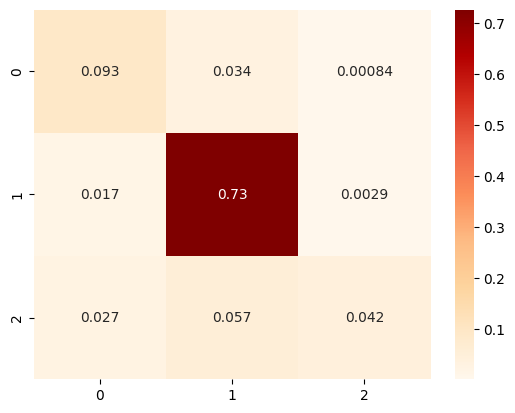

In [74]:
#Random Forest Classifier
start = time.time()
Traffic_RF = RandomForestClassifier(random_state=1)
Traffic_MulTrgt_RF = MultiOutputClassifier(Traffic_RF, n_jobs=-1)


#Training the model
Traffic_MulTrgt_RF.fit(Traffic_x_train_transformed, Traffic_y_train)
end = time.time()
print("Train time - Random forest :",end - start)

# Prediction
start = time.time()
Traffic_y_test_predicted = Traffic_MulTrgt_RF.predict(Traffic_x_test_transformed)
end = time.time()
print("Predict time - Random forest :",end - start)


#Print Stats
Traffic_RF_AccScore = accuracy_score(Traffic_y_test, Traffic_y_test_predicted)
recall = recall_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
F1 = f1_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
prec = precision_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
print('Random Forest for Traffic')
print("Accuracy score :",Traffic_RF_AccScore)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)

 # Support Vector Machines
# Creating the SVM classifier
start = time.time()
Traffic_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
Traffic_MulTrgt_SVM = MultiOutputClassifier(Traffic_SVM, n_jobs=-1)

# Train Classifier
Traffic_MulTrgt_SVM.fit(Traffic_x_train_transformed, Traffic_y_train)
end = time.time()
print("Train time - SVM :",end - start)

# Test Classifier
start = time.time()
Traffic_y_SVM_tst_pred = Traffic_MulTrgt_SVM.predict(Traffic_x_test_transformed)
end = time.time()
print("Predict time - SVM :",end - start)
Traffic_SVM_AccScore = accuracy_score(Traffic_y_test, Traffic_y_SVM_tst_pred)
recall = recall_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)
F1 = f1_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)
prec = precision_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)

print('SVM')
print("Accuracy score :",Traffic_SVM_AccScore)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)

svm_classification_report = classification_report(Traffic_y_test, Traffic_y_SVM_tst_pred)
print("SVM Classification Report:\n", svm_classification_report)

svm_confusion_matrix = confusion_matrix(Traffic_y_test.argmax(axis=1), Traffic_y_SVM_tst_pred.argmax(axis=1))
print("SVM Confusion Matrix:\n", svm_confusion_matrix)
plt.figure()
sn.heatmap(svm_confusion_matrix/np.sum(svm_confusion_matrix), annot=True,cmap="OrRd")



Machine for Traffic (Partha) with Principal Component Transform

In [65]:
#start timer - PCA transform
start = time.time()
pca = PCA(n_components=4)

scaler = StandardScaler()
Std_scaled_X_train = scaler.fit_transform(Traffic_X_train)
Std_scaled_X_test = scaler.fit_transform(Traffic_X_test)

pca.fit(Std_scaled_X_train)
pca_traffic_x_train = pca.transform(Std_scaled_X_train)
pca_traffic_x_test = pca.transform(Std_scaled_X_test)

#end time - PCA transform
end = time.time()
print("PCA reduction time",end - start)

#Random Forest Classifier
#start timer - Random forest train time
start = time.time()
Traffic_RF = RandomForestClassifier(random_state=1)
Traffic_MulTrgt_RF = MultiOutputClassifier(Traffic_RF, n_jobs=-1)


#Training the model
Traffic_MulTrgt_RF.fit(pca_traffic_x_train, Traffic_y_train)

#end timer - Random forest train time
end = time.time()
print("Random forest train time",end - start)

# Prediction
#Start timer - Random forest Predict time
start = time.time()
Traffic_y_test_predicted = Traffic_MulTrgt_RF.predict(pca_traffic_x_test)

#end timer - Random forest Predict time
end = time.time()
print("Random forest Predict time",end - start)
print(Traffic_y_test_predicted)

#Print Stats
Traffic_RF_AccScore = accuracy_score(Traffic_y_test, Traffic_y_test_predicted)
recall = recall_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
F1 = f1_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
prec = precision_score(Traffic_y_test, Traffic_y_test_predicted,average=None)
print('Random Forest for Traffic')
print("Accuracy score :",Traffic_RF_AccScore)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)

 # Support Vector Machines
# Creating the SVM classifier
#start timer - SVM train time
start = time.time()
Traffic_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
Traffic_MulTrgt_SVM = MultiOutputClassifier(Traffic_SVM, n_jobs=-1)

# Train Classifier
Traffic_MulTrgt_SVM.fit(pca_traffic_x_train, Traffic_y_train)

#end timer - SVM train time
end = time.time()
print("SVM train time",end - start)

# Test Classifier
#start timer - SVM predict time
start = time.time()
Traffic_y_SVM_tst_pred = Traffic_MulTrgt_SVM.predict(pca_traffic_x_test)

#end timer - SVM predict time
end = time.time()

#Print stats
print("SVM predict time",end - start)
Traffic_SVM_AccScore = accuracy_score(Traffic_y_test, Traffic_y_SVM_tst_pred)
recall = recall_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)
F1 = f1_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)
prec = precision_score(Traffic_y_test, Traffic_y_SVM_tst_pred ,average=None)

print('SVM')
print("Accuracy score :",Traffic_SVM_AccScore)
print("Recall score :",recall)
print("F1 score :", F1)
print("precision_score",prec)



PCA reduction time 0.054891347885131836
Random forest train time 29.234482765197754
Random forest Predict time 0.4982004165649414
[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
Random Forest for Traffic
Accuracy score : 0.8138018093835472
Recall score : [0.54365733 0.95464789 0.30369128]
F1 score : [0.66869301 0.91077667 0.42789598]
precision_score [0.86842105 0.87076053 0.724     ]
SVM train time 37.4935097694397
SVM predict time 9.318824291229248
SVM
Accuracy score : 0.7584683357879234
Recall score : [0.23558484 0.97380282 0.00838926]
F1 score : [0.35265105 0.88504864 0.01663894]
precision_score [0.70098039 0.81112154 1.        ]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


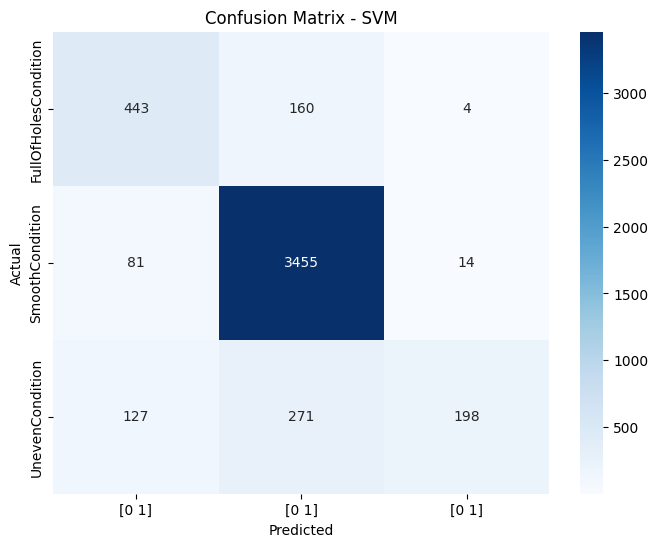

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


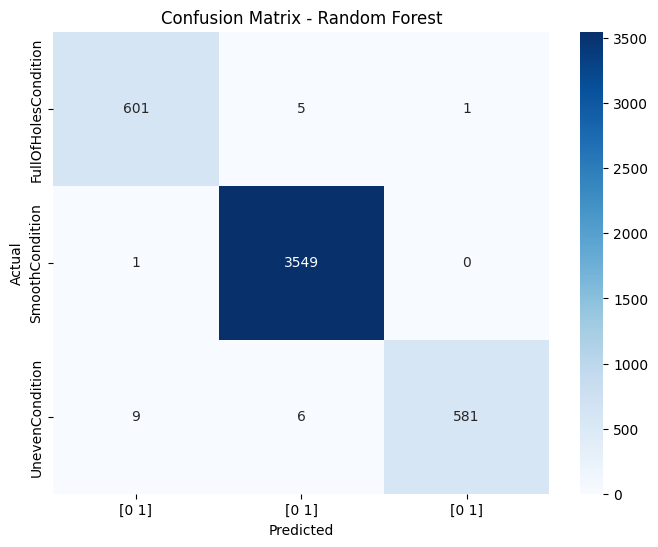

SVM Accuracy: 0.8457816116137177
Random Forest Accuracy: 0.9930570166210814
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       607
           1       0.88      0.97      0.93      3550
           2       0.91      0.34      0.50       596

   micro avg       0.88      0.85      0.87      4753
   macro avg       0.88      0.65      0.72      4753
weighted avg       0.88      0.85      0.85      4753
 samples avg       0.85      0.85      0.85      4753

SVM Confusion Matrix:
 [[ 443  160    4]
 [  81 3455   14]
 [ 127  271  198]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       607
           1       1.00      1.00      1.00      3550
           2       1.00      0.98      0.99       596

   micro avg       1.00      0.99      1.00      4753
   macro avg       1.00      0.98      0.99      4753
weighted avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#Partha
#Stat generation for Traffic congestion detection with Principal Component Transform Machine
# Plot Confusion Matrix for SVM
svm_cm = confusion_matrix(Traffic_y_test.argmax(axis=1), Traffic_y_SVM_tst_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Traffic_MulTrgt_SVM.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Random Forest
rf_cm = confusion_matrix(Traffic_y_test.argmax(axis=1), Traffic_y_test_predicted.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Traffic_MulTrgt_RF.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(Traffic_y_test, Traffic_y_SVM_tst_pred)
print("SVM Accuracy:", svm_accuracy)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(Traffic_y_test, Traffic_y_test_predicted)
print("Random Forest Accuracy:", rf_accuracy)

# Generate and print classification report for SVM
svm_classification_report = classification_report(Traffic_y_test, Traffic_y_SVM_tst_pred)
print("SVM Classification Report:\n", svm_classification_report)

# Generate and print confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(Traffic_y_test.argmax(axis=1), Traffic_y_SVM_tst_pred.argmax(axis=1))
print("SVM Confusion Matrix:\n", svm_confusion_matrix)

# Generate and print classification report for Random Forest
rf_classification_report = classification_report(Traffic_y_test, Traffic_y_test_predicted)
print("Random Forest Classification Report:\n", rf_classification_report)

# Generate and print confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(Traffic_y_test.argmax(axis=1), Traffic_y_test_predicted.argmax(axis=1))
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

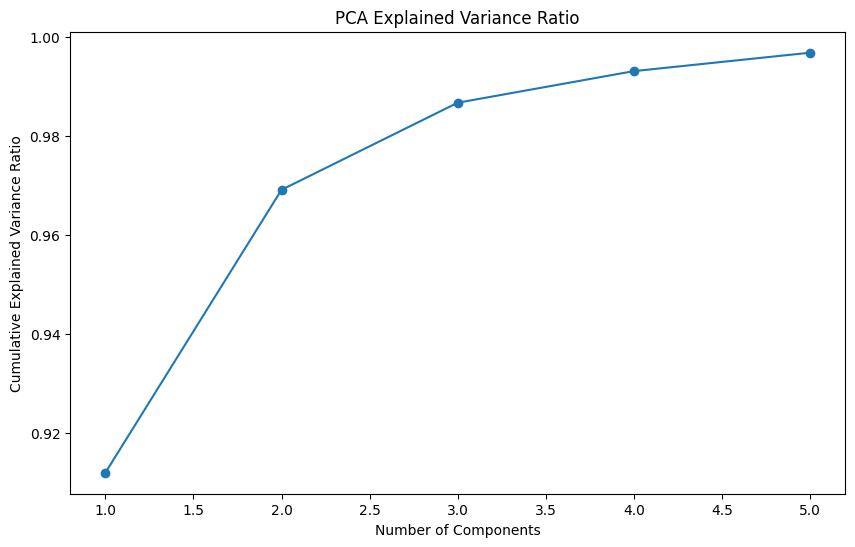

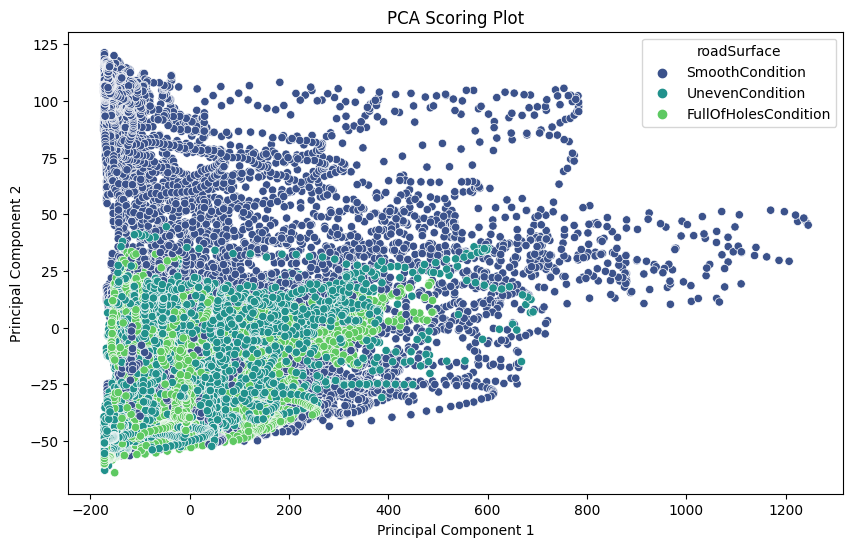

SVM Accuracy: 0.6869345676414896
Random Forest Accuracy: 0.922154428781822


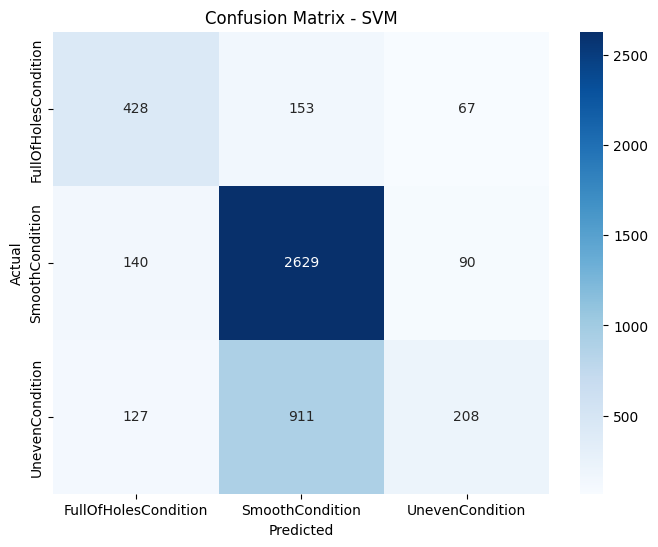

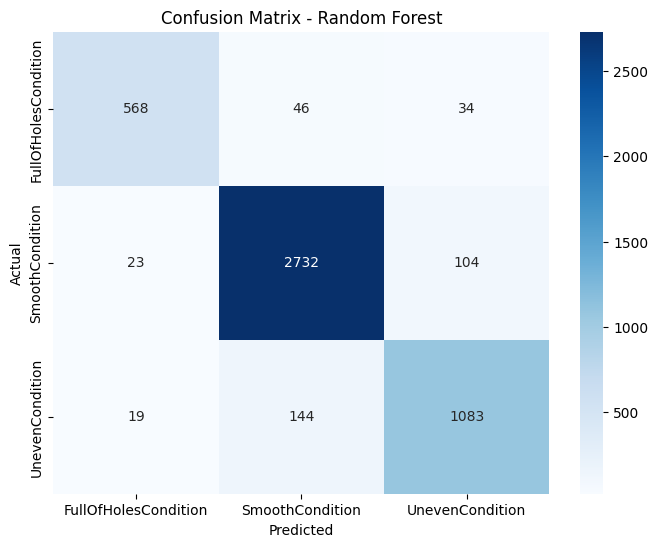

SVM Accuracy: 0.6869345676414896
Random Forest Accuracy: 0.922154428781822
SVM Classification Report:
                       precision    recall  f1-score   support

FullOfHolesCondition       0.62      0.66      0.64       648
     SmoothCondition       0.71      0.92      0.80      2859
     UnevenCondition       0.57      0.17      0.26      1246

            accuracy                           0.69      4753
           macro avg       0.63      0.58      0.57      4753
        weighted avg       0.66      0.69      0.64      4753

SVM Confusion Matrix:
 [[ 428  153   67]
 [ 140 2629   90]
 [ 127  911  208]]
Random Forest Classification Report:
                       precision    recall  f1-score   support

FullOfHolesCondition       0.93      0.88      0.90       648
     SmoothCondition       0.93      0.96      0.95      2859
     UnevenCondition       0.89      0.87      0.88      1246

            accuracy                           0.92      4753
           macro avg       0.92 

In [73]:
#Machine for Road surface with PCA

df=combined_data;
X=df.drop(Std_Outputs+Traffic_drop_features, axis = 1);
y = df['roadSurface']

# (PCA)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Plot PCA scoring plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Scoring Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#  (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print accuracies
print('SVM Accuracy:', svm_accuracy)
print('Random Forest Accuracy:', rf_accuracy)

# Plot Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate models on the testing set
svm_predictions_test = svm_model.predict(X_test)
rf_predictions_test = rf_model.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions_test)
print("SVM Accuracy:", svm_accuracy)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions_test)
print("Random Forest Accuracy:", rf_accuracy)

# Generate and print classification report for SVM
svm_classification_report = classification_report(y_test, svm_predictions_test)
print("SVM Classification Report:\n", svm_classification_report)

# Generate and print confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions_test)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)

# Generate and print classification report for Random Forest
rf_classification_report = classification_report(y_test, rf_predictions_test)
print("Random Forest Classification Report:\n", rf_classification_report)

# Generate and print confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions_test)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)


